<a href="https://colab.research.google.com/github/JHWannabe/Python-AI_5/blob/main/0221%20Day4/3_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%EB%9E%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pytorch로 구현한 손글씨
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 공개 데이터셋에서 학습 데이터를 내려받음
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# 공개 데이터셋에서 테스트 데이터를 내려받음
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
batch_size = 64

# 데이터로더를 생성, tensor에서는 dataset
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
  print('Shaper of X [N, C, H, W] : ', X.shape)
  print('Shaper of y : ', y.shape, y.dtype)
  break

Shaper of X [N, C, H, W] :  torch.Size([64, 1, 28, 28])
Shaper of y :  torch.Size([64]) torch.int64


In [4]:
# 학습에 사용할 CPU나 GPU장치를 얻음
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {} device".format(device))

Using cuda device


In [5]:
# Model 정의
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128, 10)
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits
  
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [6]:
# Loss 함수와 Optimizer 설정
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [7]:
# Training을 위한 함수
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # 예측 오류 계산
    pred = model(X)
    loss = loss_fn(pred, y)

    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [8]:
# Test를 위한 함수
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  print(size)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [9]:
epochs = 10
for t in range(epochs):
  print(f'Epoch {t+1}\----------------------------')
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)
print('끝')

Epoch 1\----------------------------
loss: 2.296057 [    0/60000]
loss: 0.462601 [ 6400/60000]
loss: 0.333322 [12800/60000]
loss: 0.449512 [19200/60000]
loss: 0.266110 [25600/60000]
loss: 0.331761 [32000/60000]
loss: 0.186896 [38400/60000]
loss: 0.345926 [44800/60000]
loss: 0.255904 [51200/60000]
loss: 0.268567 [57600/60000]
10000
Test Error: 
 Accuracy: 94.2%, Avg loss: 0.195028 

Epoch 2\----------------------------
loss: 0.126257 [    0/60000]
loss: 0.179199 [ 6400/60000]
loss: 0.104387 [12800/60000]
loss: 0.188555 [19200/60000]
loss: 0.161091 [25600/60000]
loss: 0.236747 [32000/60000]
loss: 0.070675 [38400/60000]
loss: 0.240558 [44800/60000]
loss: 0.148296 [51200/60000]
loss: 0.200870 [57600/60000]
10000
Test Error: 
 Accuracy: 96.1%, Avg loss: 0.134326 

Epoch 3\----------------------------
loss: 0.083055 [    0/60000]
loss: 0.125880 [ 6400/60000]
loss: 0.072159 [12800/60000]
loss: 0.102585 [19200/60000]
loss: 0.105121 [25600/60000]
loss: 0.187972 [32000/60000]
loss: 0.054754 [384

In [10]:
import os
from PIL import Image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('file : {name}, length : {length}bytes'.format(name=fn, length=len(uploaded[fn])))

Saving image.png to image.png
file : image.png, length : 912bytes


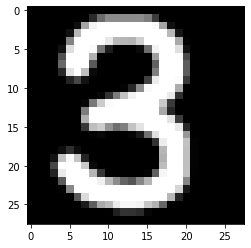

In [11]:
# image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')

# image file 읽기
cur_img = Image.open(img_path)

# 28 * 28로 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

try:
  image = np.mean(image, axis=2)
except:
  pass

# upload한 image는 흰 배경에 검은 글씨로 되어 있으므로 MNIST DATA와 같이 검은 배경에 흰 글씨로 변경
image = np.abs(255-image)
# MNIST와 동일하게 Data preprocessing(255로 나눔)
image = image.astype(np.float32)/255.
# 화면에 출력하여 확인
plt.imshow(image, cmap='gray')
plt.show()

In [12]:
image = torch.as_tensor(image).to(device).reshape(1, 1, 28, 28)
model.eval()
predict = model(image)
print('model이 예측한 값은 {}입니다.'.format(predict.argmax(1).item()))

model이 예측한 값은 3입니다.


In [13]:
# Dataset / Dataloader
# data를 처리하여 model에 공급하는 방법으로 Pytorch에서는 dataset과 dataloader를 제공
# dataset은 data와 label을 저장하고, dataloader는 dataset을 model에 공급할 수 있도록 iterable 객체로 감싸줌

from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as tr

In [15]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor() # 텐서로 바꿔주면서 이미지를 0~1사이의 값으로 변경
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor() # 텐서로 바꿔주면서 이미지를 0~1사이의 값으로 변경
)

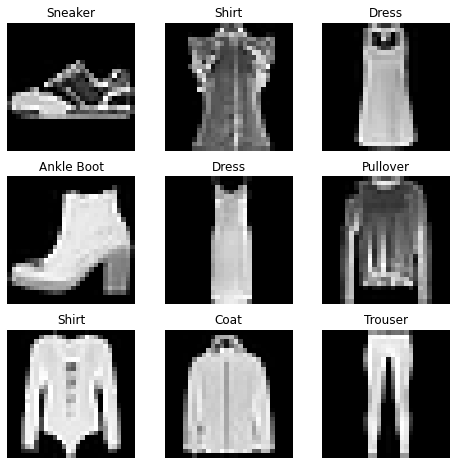

In [16]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols,i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [17]:
# DataLoader 만들기 => 데이터를 공급해주기 위해
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

Featrue batch shape: torch.Size([64, 1, 28, 28])
labels batch shape: torch.Size([64])


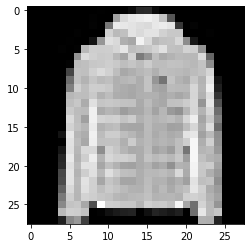

Label : 4


In [18]:
# DataLoader를 통해 반복하기(iterate)
# 이미지(image)와 정답(label)을 표시함
train_features, train_labels = next(iter(train_dataloader))
print(f'Featrue batch shape: {train_features.size()}')
print(f'labels batch shape: {train_labels.size()}')
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label : {label}')

In [19]:
# Model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


In [21]:
# Model class 만들기
class  NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128, 10)
    )
  
  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [24]:
# Model instance 생성
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [25]:
# 가상의 data를 만들어서 예측해보기
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([3], device='cuda:0')


In [26]:
# Training / Validation
# 손실함수 초기화
loss_fn = nn.CrossEntropyLoss()

In [27]:
# Optimizer
learning_rate =1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [29]:
# Training을 위한 함수
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    # 예측(prediction)과 손실(less) 계산
    pred = model(X)
    loss = loss_fn(pred, y)

    # 역전파
    # gradient 값들을 backward를 해줄 때 계속 값을 더해주기 때문에
    # loss.backward()를 호출할 때초기 설정을 매번 더해주므로
    # 한번의 학습이 끝나면 값을 0으로 초기화 해야 함
    optimizer.zero_grad()
    loss.backward() # 역전파가 일어남
    optimizer.step() # 업데이트됨

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f'loss: {loss:>7f} [{current:>5d} / {size:>5d}]')

# Test 함수
def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  with torch.no_grad(): # 메모리 절약
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size

  print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n')

In [30]:
# 학습 진행하기
epochs = 10

for t in range(epochs):
  print(f'Epoch {t+1}\n-----------------------------')
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print('완료!')

Epoch 1
-----------------------------
loss: 2.293111 [    0 / 60000]
loss: 0.559808 [ 6400 / 60000]
loss: 0.701097 [12800 / 60000]
loss: 0.461372 [19200 / 60000]
loss: 0.370448 [25600 / 60000]
loss: 0.597528 [32000 / 60000]
loss: 0.575047 [38400 / 60000]
loss: 0.503139 [44800 / 60000]
loss: 0.402364 [51200 / 60000]
loss: 0.421617 [57600 / 60000]
Test Error: 
 Accuracy: 83.3%, Avg loss: 0.468408

Epoch 2
-----------------------------
loss: 0.358566 [    0 / 60000]
loss: 0.485156 [ 6400 / 60000]
loss: 0.390960 [12800 / 60000]
loss: 0.483880 [19200 / 60000]
loss: 0.265259 [25600 / 60000]
loss: 0.785357 [32000 / 60000]
loss: 0.390153 [38400 / 60000]
loss: 0.421256 [44800 / 60000]
loss: 0.363675 [51200 / 60000]
loss: 0.432474 [57600 / 60000]
Test Error: 
 Accuracy: 84.5%, Avg loss: 0.438987

Epoch 3
-----------------------------
loss: 0.333974 [    0 / 60000]
loss: 0.477853 [ 6400 / 60000]
loss: 0.430129 [12800 / 60000]
loss: 0.435357 [19200 / 60000]
loss: 0.369024 [25600 / 60000]
loss: 0.4

In [32]:
# 학습된 model parameter 저장
torch.save(model.state_dict(), 'model_weights.pth')

In [33]:
# 새 model instance를 생성, device 설정
model2 = NeuralNetwork().to(device)
print(model2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)
